# 4 Root-Finding Methods
Root-finding can help us solve many chemical problems. A few example areas in which root finding may be of use is quantum mechanics, acid/base titration, and kinetics.

In order to numerically find the root(s) of a function, there are several methods that can be employed. 
Here we will explore the Bisection, Secant, Newton-Raphson, and Halley's methods. 
To illustrate how these methods work, we will look at the following function: $$f(x)\ =\ 0.5 x^3 + 0.25 x -7$$

A plot of the function can be seen below. Visually, we can see the root occurs between $2 < x < 3$. 

For these numerical root finding algorithms, guesses are iteratively improved until the difference between the old guess and the new guess is less than a defined threshold.
This threshold is called the convergence threshold.
The rate of convergence for each method can be defined as the number of steps required to reach this convergence threshold.
Compare the number of steps for each method below for the same convergence threshold.
This variable is set in the 2nd code block below as "tolerance".

In this first code block we are importing necessary libraries, followed by definitions of tolerance and the function we want to explore.

In [1]:
##########
# IMPORTS
##########
# These are packages needed to perform the math and visualization
import numpy as np
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import sympy as syp
x, y, z = syp.symbols('x y z')
import rf_helper_functions as pf
%matplotlib notebook


In [2]:
##########
# GLOBAL VARIABLES
##########
tolerance = 1e-6
steps_per_method = dict()
##########
# FUNCTIONS
##########


def f(x):
    return .5 * x**3 + .25 * x - 7

<IPython.core.display.Javascript object>


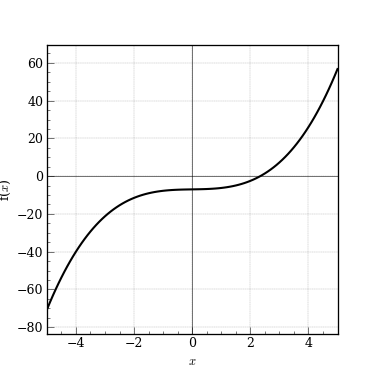

In [3]:
pf.plotf_func(-5, 5, f)

## 4.1 Bisection Method

For finding roots, the bisection method is a conceptually simple starting point.
If a function $f(x)$ changes sign between the points $a$ and $b$, then it must pass through zero. The root therefore must be between $a$ and $b$.
You may have learned this approach as the intermediate value theorem. 

The bisection method begins by taking initial guesses $a$ and $b$ that are on either side of a root.
A guess of the root is taken as the midpoint, $c\ =\ \frac{a+b}{2}$.
If a sign change occurs between $a$ and $c$, then the root must occur in this region. Otherwise the root is in the $b$ to $c$ region.
A new bisection is taken in the region containing the root. 
This process is repeated until the tolerance is reached.
This method guarantees convergence, but tends to be very slow.
Often, this method is used to find a starting guess for more efficient root finding methods. 
A visualization of the bisection method is shown below.


<img src="gif/Bisection.gif" width="500"/>

In [4]:
##########
# FUNCTIONS
##########


def midpoint(a, b):
    c = (a + b) / 2.
    return c

##########
# MAIN CODE
##########
converged = False
num_steps = 0
a = 0
b = 10
while not converged:
    c = midpoint(a, b)
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    if abs((b - a) / 2.0) < tolerance:
        converged = True
    num_steps += 1
method = "Bisection"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(c))
print("Number of steps = {}".format(num_steps))


Method: Bisection
Root = 2.34101
Number of steps = 23


## 4.2 Secant Method

The secant method evaluates $f(x)$ with an initial guess at two points ($x_0$ and $x_1$) near the root.
The root of the secant line between these two points is used to find a new guess ($x_2$).
This oldest point is discarded and the process is repeated with $x_1$ and $x_2$.
The method proceeds until the difference in guesses is below the threshold.
The secant line is defined by the equation below:
$$ y\ =\ \frac{f(x_1)\ -\ f(x_0)}{x_1\ -\ x_0}(x_2-x_1)\ +\ f(x_1)$$

To find the root of the secant line, we set $y=0$:
$$ 0\ =\ \frac{f(x_1)\ -\ f(x_0)}{x_1\ -\ x_0}(x_2\ -\ x_1)\ +\ f(x_1)$$

and rearrange to solve for $x_2$. The result is:

$$x_2\ =\ x_1\ -\ f(x_1)\frac{x_1\ -\ x_0}{f(x_1)\ -\ f(x_0)}$$

The iteration of this process results in the following recurrence relation:

$$x_n = x_{n-1}\ -\ f(x_{n-1})\frac{x_{n-1}\ -\ x_{n-2}}{f(x_{n-1})\ -\ f(x_{n-2})}$$

The figure below will demonstrate the progression secant method.
<img src="gif/secant.gif" width="500"/>

In [5]:
##########
# MAIN CODE
##########
x_old = 8
x_new = 7
num_steps = 0
converged = False
while not converged:
    temp = x_new
    x_new = x_new - (f(x_new) * ((x_new - x_old) / (f(x_new) - f(x_old))))
    x_old = temp
    num_steps += 1
    if np.abs(x_new - x_old) < tolerance:
        converged = True
method = "Secant"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(x_new))
print("Number of steps = {}".format(num_steps))


Method: Secant
Root = 2.34101
Number of steps = 10


## 4.3 Netwon-Raphson Method

The Newton-Raphson method utilizes a tangent line rather than the secant line.
The tangent line requires the first derivative of our function, $f'(x)$, to be known. 
The method begins by taking an initial guess $x_0$.
A subsequent guess ($x_1$) can be found by using the following equation of the line tangent to $f(x)$ at $x_0$: 
$$y\ =\ f'(x_0)(x\ -\ x_0)\ +\ f(x_0)$$

The root of this tangent line gives the subsequent guess. To find that root, $y$ is set to $0$:

$$0\ =\ f'(x_0)(x_1\ -\ x_0)\ +\ f(x_0)$$

This can be rearranged to find $x_1$:

$$x_1\ =\ x_0\ -\ \frac{f(x_0)}{f'(x_0)}$$

Iteration of this process results in the following recurrence relation:

$$x_n\ =\ x_{n-1}\ -\ \frac{f(x_{n-1})}{f'(x_{n-1})}$$

Below is a diagram that illustrates the iterative Newton-Raphson method.
<img src="gif/Newton.gif" width="500"/>

In [6]:
##########
# MAIN CODE
##########
converged = False
x_new = 7
num_steps = 0
while not converged:
    x_old = x_new
    x_new = x_old - (f(x_old) / (pf.analytical_first_derivative(f,x_old)))
    num_steps += 1
    if np.abs(x_new - x_old) < tolerance:
        converged = True

method = "Newton-Raphson"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(x_new))
print("Number Steps = {}".format(num_steps))


Method: Newton-Raphson
Root = 2.34101
Number Steps = 7


# 3.4 Extensions 

The methods presented here are the most common root finding methods, but they are not the only options. One example of further root finding methods is Halley's method. When evaluating the root of a function, methods that incorporate a derivative of the function are known as Householder methods.  For instance, the Newton-Raphson method (discussed above) utilizes the first derivative of the function and is known as a 1st class Householder method.  Second in the class of Householder methods is Halley's method, which incorporates the second derivative of the function. 

Halley's formula is very similar to the Newton-Raphson, but incorporates the second derivative in the denominator.  This correction is useful if it can be calculated easily. Due to the absence of a known second-derivative in many relevant physical chemistry problems, this method is often only applied for theoretical problems. If unable to be calculated with ease, it is more useful to carry out additional steps of Newton-Raphson.

Halley's method is not widely implemented due to the necessity of calculating the second derivative. If a second derivative is available, Halley's method is able to outperform Newton's method within a certain number of steps. Below we show a comparison of Newton's method and Halley's method. After beginning at the same starting guess of the root, Halley's method is able to get much closer to the root within the four steps shown.

<img src="gif/combined.gif" width="800"/>

# Summary of Results
Choosing from the many methods that exist for numerical root finding may be overwhelming.

First, it is important to consider the number of steps required for convergence. Below the number of steps required to reach the defined convergence threshold are tabulated.

In [ ]:
print("{:->28}".format(""))
print("{:^20} : {:>5}".format("Method", "Steps"))
print("{:-^20}   {:->5}".format("", ""))
for i in sorted(steps_per_method, key=steps_per_method.get, reverse=True):
    print("{:^20} : {:>5}".format(i, steps_per_method[i]))
print("{:->28}".format(""))

If the function is inexpensive to evaluate and the first and second derivatives can be evaluated analytically, we would choose Halley's Method. However, if the function and its derivatives are expensive to evaluate, then Newton-Raphson may be preferable as it does not require the second derivative. The secant and bisection methods do not require derivatives, which would be preferable if analytical derivatives are not available. The choice of method is usually a trade-off between the number of steps and the time required to calculate each step.

# Nodes of 3s orbital

The nodes of an atomic orbital are places where there is zero probability of finding the electron. These nodes are the roots of the orbital function. Let's use numerical methods to find the radial nodes of a 3s orbital given the following radial function. 

$$ 3s(r)\ =\ 2 \left( \frac{Z}{3a_0} \right)^{3/2} \left( 1 - \frac{2Zr}{3a_0} +\frac{2(Zr)^2}{27a_0^2} \right) e^{-Zr/3a_0}$$

where Z if the nuclear charge, $a_0$ is a constant and $r$ is the distance from the origin.

# Your task!
1. Define a function called `3s()` which calculates the function above. 
2. Ensure your function takes three input arguments in the following order: $Z$, $a0$, and $r$. 
3. Don't forget to replace the question marks the the right of `return` with the appropriate value to return from the function!
2. Test your function with the second code block below. 

Hints:
1. Remember that when coding an expression such as $2Zr$ to multiply $2$ by $Z$ by $r$, we must write `2*Z*r`.
2. We learned in the Introduction notebook that for some math function rely on external libraries. Here to code $e^{stuff}$, we will write this as `np.exp(stuff)`. In other words, we represent $e$ with `np.exp()` and any terms we needed exponentiated will go in the parentheses. 

In [ ]:
## code your function here
def calc_3s(Z,a,r):
    a = 2.*((Z/(3*a0))**(3./2.))
    b =(1 - ((2*Z*r)/(3*a0))+((2*(Z*r)**2)/(27*(a0**2))))
    c = np.exp(-(Z*r)/(3*a0))
    sol = a*b*c
    return sol


In [ ]:
Z = 6
a0 = 1
r = 5

pf.check_R30(calc_3s,Z,a0,r)

Now that you have correctly coded the example function above, we can find roots of this s orbital function. The nodal position will shift in position as the charge of the nuclei changes. We are going to use the bisection method to track this down. We are using this method for two reasons: it does not require a first derivative and it is guaranteed to converge (although it may take many iterations.)

We will observe how the starting guess in root finding will affect the estimate. 

# Your task! (continued)
To complete this task, you will run the cell block below **without changing anything**.
Continue to the text block below for further instruction


In [ ]:
import ipywidgets as ipw
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as sc


def bisection(a,b,f,Z,a0):
    tolerance = 0.000001
    converged = False
    num_steps = 0
    while not converged:
        c = midpoint(a,b)
        if np.sign(f(Z,a0,c)) == np.sign(f(Z,a0,a)):
            a = c
        else:
            b = c
        if abs((b - a) / 2.0) < tolerance:
            converged = True
        num_steps += 1
    return c



def pylt(root1,root2,Z,a0):
    distance = np.linspace(-0.3,4,100)
    fig,ax = plt.subplots(figsize=(8,4),facecolor='white')
    plt.grid(True)
    plt.xlabel('$r$')
    plt.ylabel('$\phi_{3s} (r)$')    
    R = calc_3s(Z,a0,distance)
    root_real = bisection(root1,root2,calc_3s,Z,a0)
    line, = ax.plot(distance, R ,label = '$R_{3s}$')
    root_g1, = ax.plot(root1,calc_3s(Z,a0,root1), linestyle='',marker='.', markersize = 20, color = 'gray')
    root_g2, = ax.plot(root2,calc_3s(Z,a0,root2), linestyle='',marker='.', markersize = 20, color = 'gray')
    root_r, = ax.plot(root_real,calc_3s(Z,a0,root_real), linestyle='',marker='.',color = 'red')
    y_min = 1.1*min(R)
    y_max = 1.1*max(calc_3s(Z,a0,np.linspace(0.2,4,100)))
    root_annotation = ax.annotate(r'root = {:.2f}'.format(root_real), xy = (max(distance)*0.7,y_max*0.6))
    f_annotation = ax.annotate(r"$f(root)$ = {:.2f}".format(calc_3s(Z,a0,root_real)), xy = (max(distance)*0.7,0.4*y_max))
    ax.set_ylim(y_min,y_max)
    plt.legend()
    plt.show()

ipw.interact(pylt,root1=(0.,4.),root2=(0.,4.),Z=(3,35),a0=ipw.fixed(a0))


For each value of Z, there will be two nodes in the 3-s wavefunction. We are going to locate these two roots as Z changes using the bisection method defined above. 

## Your Task (continued)
1. Move the Z value to be close to 12
2. Move the root 2 guess to somewhere left of the root.
3. Move the root 1 guess to somewhere right of the root.
4. Record where your Z value and  the value of the two roots you find.
5. Repeat steps 1-4 for Z values = 3,7, 20, 35
6. What happens to the position of the node as Z increase?
7. Why do you think this happens?
